<img src="https://static.uni-graz.at/fileadmin/nawi-institute/Erdwissenschaften/NawiGrazGeozentrum_Small.png" align="right" width=200>

# Notebook 6: Curve fitting with Scipy

*Developed by Raoul Collenteur, University of Graz, 2020.*

In this final Notebook we will learn about the [SciPy package](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html), which is a collection of tools that are commonly used in scientific studies. The SciPy package is part of the Scipy Ecosystem, which also includes Numpy, Pandas and Matplotlib. Together, these four packages contain the most important methods for many exercises in science, mathematics and engineering. 

There are many different sub-packages in the SciPy package, and in this Notebook we will look into one of them: `scipy.optimize`. This is a package that contains algorithms to find 'optimal' parameter values by fitting a model to observed data, a common task in research.

### Lecture content

1. [Importing Scipy methods](#1-Importing-Scipy-methods)
2. [Fitting a curve](#2-Fitting-a-curve)
3. [Least Squares solutions](#3-Least-Squares-solutions)
4. [Finding the least-squares solution](#4-Finding-the-least-squares-solution)


In [2]:
# Import packages here
import numpy as np
import matplotlib.pyplot as plt

## 1. Importing Scipy methods
The SciPy package is subdivided into multiple sub-packages and methods. It is common practice to import a single function from SciPy instead of importing the entire package. The following statement can be used to import the `curve_fit` function from the `optimize` package:

In [3]:
from scipy.optimize import curve_fit

In [5]:
#curve_fit?

There are many methods in the `optimize` package to find optimal parameters for a function and data, for example `minimize`, `curve_fit`. There are many different differrent algorithms to find the optimal parameters for a problem, which is a science on it's own. An overview of all methods available in Scipy can be found here: https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize.

## 2. Fitting a function to some data
The first method we will look at is `curve_fit`, a easy-to-use method to fit a model to observed data. First, let's generate some synthetic data, for the following linear function:

$$y = Ax + B$$

Where $A$ and $B$ are model parameters. We will start by defining a function that calculates $y$ for different values of $x$.

In [7]:
def model(x, p1, p2):
    """Method to calculate y = ax +b .
    
    Parameters
    ----------
    x: np.ndarray
        Numpy array with the values for x.
    p1: float
        parameter a.
    p2: float
        parameter b.
    
    Returns
    -------
    y: np.ndarray
        computed values for y.
    
    """
    y = p1 * x + p2
    return y

We can use the `model` defined in the previous code-block to calculate values for $y$, providing different parameters to the function. In the codeblock below, we use the method to generate synthetic values for $y$, before adding some random noise to the values using `numpy.random` sub-package.

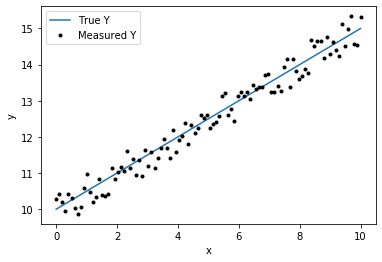

In [9]:
n = 100  # Number of points to calculate x for.
p1_true = 0.5
p2_true = 10

x_data = np.linspace(0,10, n)
y_true = model(x_data, p1_true, p2_true)
y_data = y_true + np.random.rand(n) - 0.5  # Add some random noise

# Plot the data 
plt.plot(x_data, y_true)
plt.plot(x_data, y_data, marker=".", linestyle=" ", color='k')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True Y", "Measured Y"])

Having defined a method that returns the values for $y$, it is now easy to use `curve_fit` to fit the model to the noisy data. For this, we provide the `curve_fit` method with a function that returns the estimate of $y$ (`model` in this case) and the $x$ and observed $y$-data. The `curve_method` return a tuple with two arrays: the optimal parameters and the covariance matrix. Here, we will only use the optimal parameters.

In [12]:
# Run curve_fit
result = curve_fit(model, xdata=x_data, ydata=y_data)

# Print the result
result[0]

array([0.50783731, 9.92443577])

The optimal parameters should be close to the original parameters that were used to generate the data, but not exactly the same because we added random noise. To visually check our result, we can simulate $y$ using the estimated parameters and plot the result as follows.

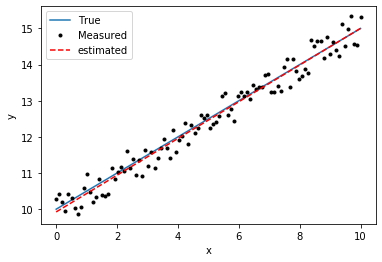

In [13]:
# Select the estimated parameters
# e1 = result[0][0] 
# e2 = result[0][1]
e1, e2 = result[0]
y_sim = model(x_data, e1, e2)  # Use the model method to simulatev  using the estimated parameters

plt.plot(x_data, y_true)
plt.plot(x_data, y_data, color="k", linestyle=" ", marker=".")
plt.plot(x_data, y_sim, color="r", linestyle="--")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Measured", "estimated"])

### Exercise 1: fitting a polynomial
In this exercise we will fit a polynomial of the following form to some data:

$$y(x) = a_1 x^2 + a_2 x + a_3$$

where $a1$, $a2$, and $a3$ are parameters that need to be calibrated. Perform the following tasks in Python:

- Define a function `polynomial` that takes $x$, $a1$, $a2$, and $a3$ as input arguments, calculates $y$  and returns $y$.
- define three variables: $a1=1.5$, $a2=-2.5$, and $a3=2.0$
- Generate data with a little noise (already done) for the interval $-5 < x < 10$
- use `curve_fit` to find the optimal parameters for $a1$, $a2$, and $a3$.
- Plot the True $y$, Noisy $y$ and estimated $y$ against $x$

In [ ]:
# Define the function

# Define the "True" parameters

# Create arrays with x, y, and y+noise
x = np.linspace(-5, 10)
y_true = polynomial(x, a1, a2, a3)
y_noise = y_true + 10 * (np.random.rand(len(y_true))-0.5)

# Find the optimal parameters

# Plot the results


[Answer](#Exercise-1)

## 3. Least-Squares solutions
To calibrate the model and estimate the optimal parameters, `curve_fit` internally minimizes the sum of squared residuals as an objective function:
The following objective function:

$$ S(\beta) = \sum_{i=1}^N (y_i-f(\beta))^2$$

where $\beta$ is the parameter set, $y_i$ the observed value of $y$ at index $i$, and $f$ a function that simulates $y$. Finding the minimum value for $S$ means we obtain the so-called "least-squares" solution of the problem. The method `curve_fit` iteratively changes the values of the parameters and evaluates the effect of the change in parameters on the objective function $S$.

### Exercise 2: Define a residual and objective fucntion
In this exercise you will write two functions: the first calculating the residuals and the second calculating the values for the objective function $S$:

1. Define a function named `residuals`, that takes in input argument `p`, which is an array of length 2. This function internally calls the `model` method defined in the code-block below and stores the result in a local variable `sim`. The function should then calculate (`sim-obs`) return the residuals.
2. Define a function named `obj_func` that calculates the value of $S$, using the residuals function to calculate the residuals. The method should return the values of the objective function.
3. Test the methods using the provided code, the residuals should be between the two red lines

In [ ]:
# Create x and y data
x_data = np.linspace(0,10, n)
y_true = model(x_data, p1_true, p2_true)
obs = y_true + np.random.rand(n) - 0.5  # Add some random noise

# define the model
def model(x, p1, p2):
    y = p1 * x + p2
    return y

# Define the residuals function here

# Define the obj_func function here


# Test the methods
p = [0.5, 10]
res = residuals(p)
plt.plot(x_data, res)
plt.title("S={:.2f}".format(obj_func(p)))
plt.axhline(0.5, c="r")
plt.axhline(-0.5, c="r")

[Answer](#Exercise-2)

### 4. Finding the least-squares solution
The use of an objective function to estimate the parameters can have some benefits over using curve_fit, for example the possibility the define different objective functions. To find the minimum of a function, Scipy has the `minimize` method. [See the documenation here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize). This method takes a function that returns the value of an objective function (a single value). 

### Exercise 3: import minimize from scipy

In [14]:
# Import Scipy here
from scipy.optimize import minimize

[Answer](#Exercise-3)

Now we define two new methods, a `linear_model` (similar to `model` earlier), and an objective function that calculate $S$.

In [16]:
def linear_model(p1, p2):
    y = p1 * x + p2
    return y

def obj_func(p):
    sim = linear_model(p[0], p[1])
    res = sim - obs
    S = sum(res**2)
    return S

To find the optimal parameters, we minimize the objective funnction using `minimize`. The `minimize` method returns an Python object, which is a collection of different variables. The following code block shows how to use the method to fit a model to some data.

In [26]:
# Generate some data
x = np.linspace(0, 100)
y_true = linear_model(5, 9)
obs = y_true + 100*(np.random.rand(len(x)) - 0.5)  # Add some random noise

# Run minimize
p0 = np.array([3, 1])  # Initial guess for the parameters
result = minimize(obj_func, p0)
print(result)

      fun: 44156.20766929047
 hess_inv: array([[ 6.56096745e-07, -3.28048234e-05],
       [-3.28048234e-05,  1.16402322e-02]])
      jac: array([-0.00048828,  0.        ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 61
      nit: 6
     njev: 15
   status: 2
  success: False
        x: array([ 4.91580739, 12.68079047])


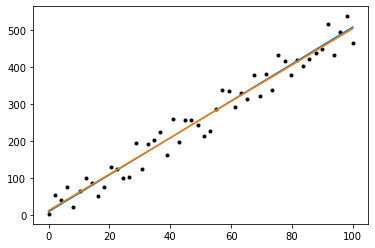

In [30]:
plt.plot(x, obs, marker=".", linestyle=" ", c="k")
plt.plot(x, y_true)
plt.plot(x, linear_model(result.x[0], result.x[1]))

As you can see, this method return a little more information than the `curve_fit` method. The optimization is a success (`result.success`), a number of function evaluations (`result.nfev`) and the optimal parameters (`results.x`).

In [ ]:
# Estimated parameters
result.x

### Exercise 4: Check the value for the objective function
One of the things reported by the `minimize` method is the values of the objective function: `result.fun`. Use the optimized parameters to calculate the value of the objective function and validate that this is similar to `result.fun`.

In [ ]:
# Type your answer here

[Answer](#Exercise-3)

## Additional reading:
- scipy `curve_fit` docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit
- scipy `minimize` docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

## Answers to Exercises

### Exercise 1

In [ ]:
# Define the function
def polynomial(x, a1, a2, a3):
    y = a1 * x ** 2 + a2 * x + a3
    return y

# Define the "True" parameters
a1 = 1.50
a2 = -2.50
a3 = 2.0

# Create arrays with x, y, and y+noise
x = np.linspace(-5, 10)
y_true = polynomial(x, a1, a2, a3)
y_noise = y_true + 10 * (np.random.rand(len(y_true))-0.5)

# Find the optimal parameters
result = curve_fit(polynomial, xdata=x, ydata=y_noise)
e1,e2,e3 = result[0]

# Plot the results
plt.plot(x, y_true, linewidth=3)
plt.plot(x, y_noise, marker=".", linestyle=" ", color="k")
plt.plot(x, polynomial(x, e1, e2, e3), linestyle="--", color="r")
plt.xlabel("x")
plt.ylabel("y")

### Exercise 2

In [ ]:
# Create x and y data
x_data = np.linspace(0,10, n)
y_true = model(x_data, p1_true, p2_true)
obs = y_true + np.random.rand(n) - 0.5  # Add some random noise, obs is now a global variable

# define the model
def model(x, p1, p2):
    y = p1 * x + p2
    return y

# Define the residuals function here
def residuals(p):
    sim = model(x_data, p[0], p[1])
    res = sim - obs  # This makes use of the global variable obs!
    return res

# Define the obj_func function here
def obj_func(p):
    res = residuals(p)
    S = sum(res**2)
    return S

# Test the methods
p = [0.5, 10]
res = residuals(p)
plt.plot(x_data, res)
plt.title("S={:.2f}".format(obj_func(p)))
plt.axhline(0.5, c="r")
plt.axhline(-0.5, c="r")

### Exercise 3

In [ ]:
from scipy.optimize import minimize

### Exercise 4

In [ ]:
s = obj_func(result.x)
print(s, result.fun)